<a href="https://colab.research.google.com/github/Wftorres29/ProyectoBanco/blob/main/ProyectoBancowft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1) Descripcón del Problema**

Las amenazas financieras están mostrando una tendencia sobre el riesgo crediticio de los bancos comerciales a medida que ha surgido la increíble mejora en la industria financiera. De esta forma, una de las mayores amenazas a las que se enfrentan los bancos comerciales es la predicción del riesgo de los clientes de crédito.

Los estudios recientes se centran principalmente en mejorar el rendimiento del clasificador para la predicción de incumplimiento de tarjetas

En los problemas de clasificación, un conjunto de datos desequilibrado también es crucial para mejorar el rendimiento del modelo porque la mayoría de los casos se encuentran en una clase y solo unos pocos ejemplos están en otras categorías

Objetivo General : Encontrar un modelo de clasificación y predicción para predecir el Default de Crédito para Bank of America

# **2) Depuración de datos**



## **2.1 Librerías**

In [ ]:
import numpy as np # para cálculo matricual y matemáticas
import pandas as pd # para depurar datos
#! pip install numpy
import seaborn as sns


## **2.2 Importar datos**

In [ ]:
url="https://raw.githubusercontent.com/Wftorres29/ProyectoBanco/main/UCI_Credit_Card.csv"

In [ ]:
df=pd.read_csv(url)

In [ ]:
#Encabezado
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## **2.3 Dimensión BD**

In [ ]:
print(df.shape)

(30000, 25)


## **2.4 Diccionario de variables**
* ID : ID de cada cliente
* LIMIT_BAL : cantidad del crédito otorgado en dólares NT (incluye crédito individual y familiar / suplementario
* SEXO : Género (1 = masculino, 2 = femenino)
* MATRIMONIO : Estado civil (1 = casado, 2 = soltero, 3 = otros)
* EDUCACIÓN : (1 = posgrado, 2 = universidad, 3 = bachillerato, 4 = otros, 5 = desconocido, 6 = desconocido)
* EDAD : Edad en años
* PAY_0 : Estado de reembolso en septiembre de 2005 (-1 = pago debidamente, 1 = retraso en el pago durante un mes, 
2 = retraso en el pago durante dos meses,
 8 = retraso en el pago durante ocho meses,
 9 = retraso en el pago durante nueve meses o más)
 
* PAY_2 : Estado de reembolso en agosto de 2005 (escala igual a la anterior)
* PAY_3 : Estado de reembolso en julio de 2005 (escala igual a la anterior)
* PAY_4 : Estado de reembolso en junio de 2005 (escala igual a la anterior)
* PAY_5 : Estado de reembolso en mayo de 2005 (escala igual a la anterior)
* PAY_6 : Estado de reembolso en abril de 2005 (escala igual a la anterior)
* BILL_AMT1 : Monto del extracto de la factura en septiembre de 2005 (dólar NT)
* BILL_AMT2 : Monto del extracto de la factura en agosto de 2005 (dólar NT)
* BILL_AMT3 : Monto del extracto de la factura en julio de 2005 (dólar NT)
* BILL_AMT4 : Monto del extracto de la factura en junio de 2005 (dólar NT)
* BILL_AMT5 : Monto del extracto de la factura en mayo de 2005 (dólar NT)
* BILL_AMT6 : Monto del extracto de la factura en abril de 2005 (dólar NT)
* PAY_AMT1 : Monto del pago anterior en septiembre de 2005 (dólar NT)
* PAY_AMT2 : Monto del pago anterior en agosto de 2005 (dólar NT)
* PAY_AMT3 : Monto del pago anterior en julio de 2005 (dólar NT)
* PAY_AMT4 : Monto del pago anterior en junio de 2005 (dólar NT)
* PAY_AMT5 : Monto del pago anterior en mayo de 2005 (dólar NT)
* PAY_AMT6 : Monto del pago anterior en abril de 2005 (dólar NT)
* default.payment.next.month : pago predeterminado (1 = sí, 0 = no)
* Variable Nueva

  * Categoria de la Persona: Joven, Adulto, Adulto Mayor

In [ ]:
print(df.columns.tolist())

['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default.payment.next.month']


## **2.5 Recodificar variables**

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [ ]:
## Id debe ser tipo string
df.ID=df.ID.astype(str)

In [ ]:
## Validar variable Sex
df.SEX.value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [ ]:
## SEX debe ser tipo categórica
df.SEX=df.SEX.astype("category")

In [ ]:
## Validar Educacion
#EDUCACIÓN : (1 = posgrado, 2 = universidad, 3 = bachillerato, 4 = otros, 5 = desconocido, 6 = desconocido)
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [ ]:
## filtra los que tienen educación igual a 6 y los cambia por valor 5
df.EDUCATION[df.EDUCATION==6]=5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      331
4      123
0       14
Name: EDUCATION, dtype: int64

In [ ]:
## filtra los que tienen educación igual a 0
df.EDUCATION[df.EDUCATION==0]

3769     0
5945     0
6876     0
14631    0
15107    0
16881    0
16896    0
17414    0
19920    0
20030    0
23234    0
24137    0
27155    0
27270    0
Name: EDUCATION, dtype: int64

In [ ]:
## filtra los que tienen educación igual a 0 y los cambia por no aplica
df.EDUCATION[df.EDUCATION==0]=np.nan

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df.EDUCATION.value_counts()

2.0    14030
1.0    10585
3.0     4917
5.0      331
4.0      123
Name: EDUCATION, dtype: int64

In [ ]:
## Education debe ser tipo categórica
#df.EDUCATION=df.EDUCATION.astype("category")

In [ ]:
df.isnull().sum()

ID                             0
LIMIT_BAL                      0
SEX                            0
EDUCATION                     14
MARRIAGE                       0
AGE                            0
PAY_0                          0
PAY_2                          0
PAY_3                          0
PAY_4                          0
PAY_5                          0
PAY_6                          0
BILL_AMT1                      0
BILL_AMT2                      0
BILL_AMT3                      0
BILL_AMT4                      0
BILL_AMT5                      0
BILL_AMT6                      0
PAY_AMT1                       0
PAY_AMT2                       0
PAY_AMT3                       0
PAY_AMT4                       0
PAY_AMT5                       0
PAY_AMT6                       0
default.payment.next.month     0
dtype: int64

In [ ]:
## Validar Estado Civil
# MATRIMONIO : Estado civil (1 = casado, 2 = soltero, 3 = otros)
df.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [ ]:
df.MARRIAGE[df.EDUCATION==0]=np.nan

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
## Estado civil debe ser tipo categórica
df.MARRIAGE=df.MARRIAGE.astype("category")

In [ ]:
## Validar PAY
# 
df.PAY_0.value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

In [ ]:
## Variables PAY deben ser tipo categórica
df[["PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]]=df[["PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]].astype("category")

In [ ]:
df["default.payment.next.month"].value_counts()

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

In [ ]:
df["default.payment.next.month"].value_counts()/len(df)

0    0.7788
1    0.2212
Name: default.payment.next.month, dtype: float64

In [ ]:
## Cambiar el nombre de esta variable
df.rename(columns={"default.payment.next.month":"Mora"},inplace=True)

In [ ]:
## Variables MORA deben ser tipo categórica
df.Mora=df.Mora.astype("category")

## **2.6 Tratamiento para valores nulos**

* Variables tipo Factor se imputan por Moda.
* Variables numericas se imputan por promedio si son normales, de lo contrario, por la Mediana

In [ ]:
## importamos la librería de estadística desde scipy
from scipy import stats

En caso de que no funcione el código anterior, se debe instalar scipy con este código
#! pip install scipy

In [ ]:
moda_EDUCATION=stats.mode(df.EDUCATION)
print(moda_EDUCATION)

ModeResult(mode=array([2.]), count=array([14030]))


In [ ]:
print(moda_EDUCATION[0][0])

2.0


In [ ]:
df.EDUCATION=df.EDUCATION.replace(np.nan,moda_EDUCATION[0][0])

In [ ]:
df.EDUCATION=df.EDUCATION.astype("category")

## **2.7 Conteo de variables**

In [ ]:
VariablesNumericas=df._get_numeric_data().columns.to_list()
print(VariablesNumericas)

['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


In [ ]:
len(VariablesNumericas)

14

In [ ]:
## Variables categóricas
VariablesCategoricas=df.select_dtypes(include=["category"]).columns.to_list()
print(VariablesCategoricas)
print(len(VariablesCategoricas))

['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'Mora']
10


In [ ]:
## String
VariablesTexto=df.select_dtypes(include=["object"]).columns.to_list()
print(VariablesTexto)

['ID']


# **3) Análisis exploratorio y descriptivo de datos**

## **3.1 Análisis univariado tipo numérico**

In [ ]:
MontoCredito=df.LIMIT_BAL

### **3.1.1 Normalidad**

In [ ]:
import matplotlib.pyplot as plt

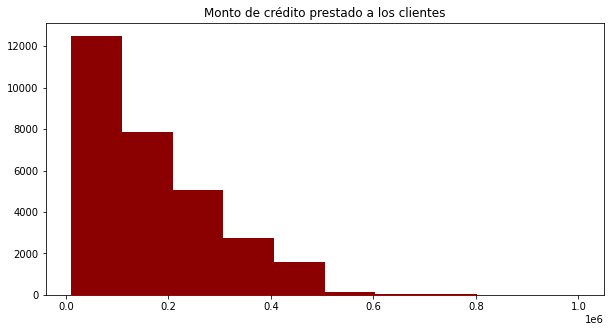

In [ ]:
## Histograma
plt.figure(figsize=(10,5))
plt.hist(MontoCredito, facecolor="darkred")
plt.title("Monto de crédito prestado a los clientes")
plt.show()

In [ ]:
PromedioInicial=np.mean(MontoCredito)
print(PromedioInicial)

167484.32266666667


**Verificar normalidad**

**Gráfica Q-Q**

Los gráficos de cuantiles teóricos (Gráficos Q-Q). Estos gráficos comparan los cuantiles de la distribución observada con los cuantiles teóricos de una distribución normal con la misma media y desviación estándar que los datos. Cuanto más se aproximen los datos a una normal, más alineados están los puntos entorno a la recta.

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


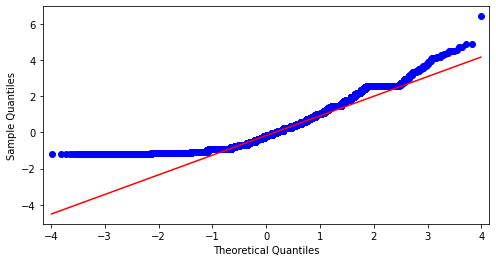

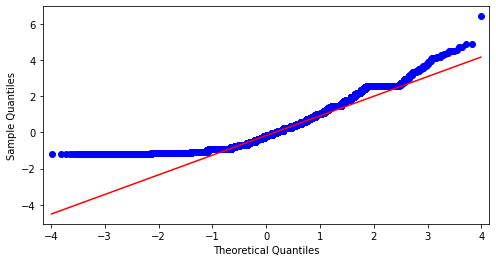

In [ ]:
fig, ax=plt.subplots(figsize=(8,4))
sm.qqplot(MontoCredito, fit=True, line="q", ax=ax)

**Métodos analíticos** Una prueba de hipótesis es una regla que especifica si se puede aceptar o rechazar una afirmación acerca de una población dependiendo de la evidencia proporcionada por una muestra de datos.

Un punto de decisión importante al trabajar con una muestra de datos es si utilizar métodos estadísticos paramétricos o no paramétricos. Los métodos estadísticos paramétricos asumen que los datos tienen una distribución conocida y específica, a menudo una distribución Gaussiana. Si una muestra de datos no es Gaussiana, entonces se violan los supuestos de las pruebas estadísticas paramétricas y deben usarse métodos estadísticos no paramétricos.

**Interpretación de una prueba**
* H0: El monto del crédito proviene de una distribución normal.
* Ha: El monto del crédito NO proviene de una distribución normal.

Pvalor;
* p<=alfa: rechazar H0, no es normal.
* p>alfa: No rechazar H0, no significa que sea cierta normalidad, significa que es muy probable que sea normal.

Prueba de Shapiro-Wilk: Evalúa una muestra de datos y cuantifica la probabilidad de que los datos se extraigan de una distribución Gaussiana, llamada así por Samuel Shapiro y Margin Wilk.

En la práctica, se cree que la prueba de Shapiro-Wilk es una prueba confiable de normalidad, auqnue se sugiere que la prueba puede ser adecuada para muestras de datos más pequeñas, por ejemplo, miles de observaciones o menos.

**D'Agostino's K-squared test** la prueba verifica si la forma de la distribución es similar a la formla de la distribución normal. Esta es una combinación de la prueba de asimetría y la prueba de curtosis.

In [ ]:
import scipy

In [ ]:
stat,pvalue=stats.shapiro(MontoCredito)

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
pvalue

0.0

* Según Shapiro, el monto de crédito no es normal

In [ ]:
k2,pvalue2=stats.normaltest(MontoCredito)

In [ ]:
pvalue2

0.0

* Ninguno de los test muestra evidencias para aceptar normalidad

**Consecuencias de la falta de normalidad**

### **3.1.2 Normalidad puede estar afectada por Datos Atípicos**

* Detectar Datos Atípicos

**Análisis Gráfico Univariado** 

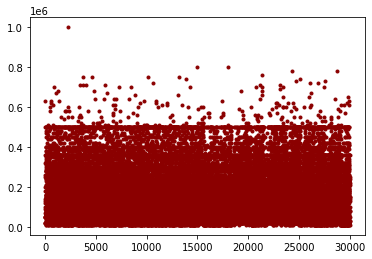

In [ ]:
plt.plot(MontoCredito, ".",color="darkred")
plt.show()

In [ ]:
MontoCredito.describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

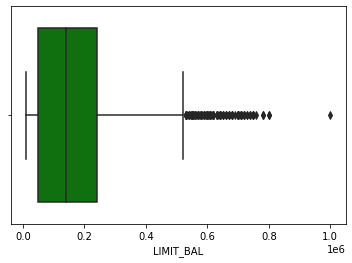

In [ ]:
sns.boxplot(x=MontoCredito, color="green")

In [ ]:
## Límites
## Límite Inferior
q1,q3=np.percentile(MontoCredito,[25,75])

In [ ]:
q1

50000.0

In [ ]:
q3

240000.0

In [ ]:
RIC=q3-q1

In [ ]:
RIC

190000.0

In [ ]:
# Límite Superior
Limite_Superior=q3+1.5*(RIC)

In [ ]:
Limite_Superior

525000.0

In [ ]:
# Límite Inferior
Limite_Inferior=q1-1.5*(RIC)

In [ ]:
Limite_Inferior

-235000.0

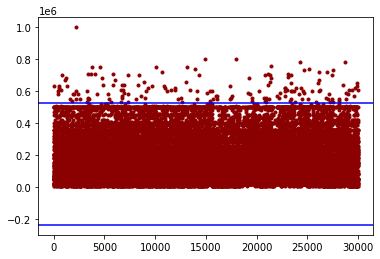

In [ ]:
plt.plot(MontoCredito, ".",color="darkred")
plt.axhline(y=Limite_Superior,color="blue")
plt.axhline(y=Limite_Inferior,color="blue")
plt.show()

In [ ]:
df_Monto_Atipicos= df[(df.LIMIT_BAL >= Limite_Superior) | (df.LIMIT_BAL <= Limite_Inferior)]

In [ ]:
df_Monto_Atipicos.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Mora
12,13,630000.0,2,2.0,2,41,-1,0,-1,-1,...,6500.0,6500.0,2870.0,1000.0,6500.0,6500.0,6500.0,2870.0,0.0,0
433,434,580000.0,2,1.0,1,36,0,0,0,0,...,169365.0,168755.0,167964.0,6422.0,6565.0,5951.0,6006.0,5894.0,5946.0,0
451,452,600000.0,1,1.0,1,53,2,2,0,0,...,447130.0,440982.0,434715.0,0.0,18000.0,16000.0,16000.0,21000.0,20000.0,1
527,528,620000.0,2,2.0,1,45,2,2,0,0,...,163781.0,167159.0,170894.0,0.0,6200.0,6000.0,6000.0,6500.0,6000.0,1
555,556,630000.0,2,2.0,1,47,0,0,0,-1,...,2632.0,8654.0,0.0,38187.0,1207.0,2632.0,8654.0,0.0,4981.0,0


In [ ]:
df_Monto_Atipicos.shape

(167, 25)

In [ ]:
(len(df_Monto_Atipicos)/len(df))*100

0.5566666666666666

**Exportar Excel**

In [ ]:
from pandas._libs import index
df_Monto_Atipicos.to_excel("/content/drive/MyDrive/Cedesistemas-Analitica/Diplomado_2022/ModelosSupervisado/Clasificacion/ClientesAtipicos.xlsx", index=False)

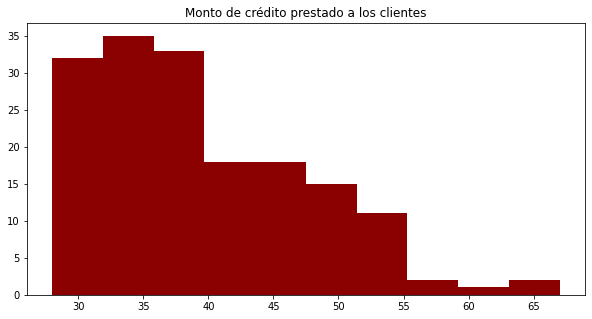

In [ ]:
## Histograma por edad
plt.figure(figsize=(10,5))
plt.hist(df_Monto_Atipicos.AGE, facecolor="darkred")
plt.title("Monto de crédito prestado a los clientes")
plt.show()

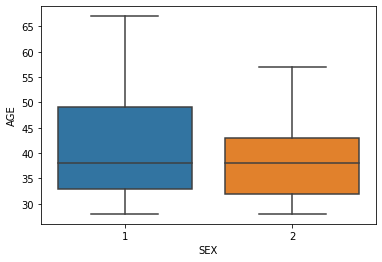

In [ ]:
sns.boxplot(x="SEX", y="AGE", data=df_Monto_Atipicos)

**Promedio sin datos atípicos**

In [ ]:
df_Sin_Monto_Atipicos= df[(df.LIMIT_BAL < Limite_Superior) & (df.LIMIT_BAL > Limite_Inferior)]
df_Sin_Monto_Atipicos.shape

(29833, 25)

In [ ]:
print(PromedioInicial)

167484.32266666667


In [78]:
PromedioSinAtipico=np.mean(df_Sin_Monto_Atipicos.LIMIT_BAL)
print(PromedioSinAtipico)

164963.2849529045


**Prueba de normalidad**

In [79]:
stat,pvalue=stats.shapiro(df_Sin_Monto_Atipicos.LIMIT_BAL)
pvalue

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


0.0

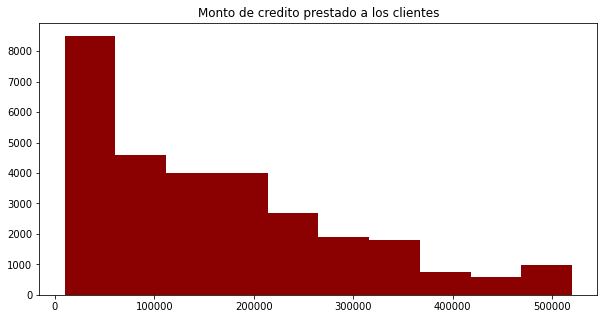

In [80]:
plt.figure(figsize=(10,5))
plt.hist(df_Sin_Monto_Atipicos.LIMIT_BAL,facecolor="darkred")
plt.title("Monto de credito prestado a los clientes")
plt.show()

* No parametrico
* Simulacion Computacional

###3.1.3 Enfoque no Paramétrico para calcular un paramétro Poblacional: Simulación computacional

### **3.1.3 Enfoque no Paramétrico para calcular un paramétro Poblacional: Simulación computacional**

Bootstrapping El bootstrapping (o bootstrap) es un método de remuestreo propuesto por Bradley Efron en 1979. Se utiliza para aproximar la distribución en el muestreo de un estadístico. Se usa frecuentemente para aproximar el sesgo o la varianza de un análisis estadístico, así como para construir intervalos de confianza o realizar contrastes de hipótesis sobre parámetros de interés. En la mayor parte de los casos no pueden obtenerse expresiones cerradas para las aproximaciones bootstrap y por lo tanto es necesario obtener remuestras en un ordenador para poner a prueba el método. La enorme potencia de cálculo de los ordenadores actuales facilita considerablemente la aplicabilidad de este método tan costoso computacionalmente

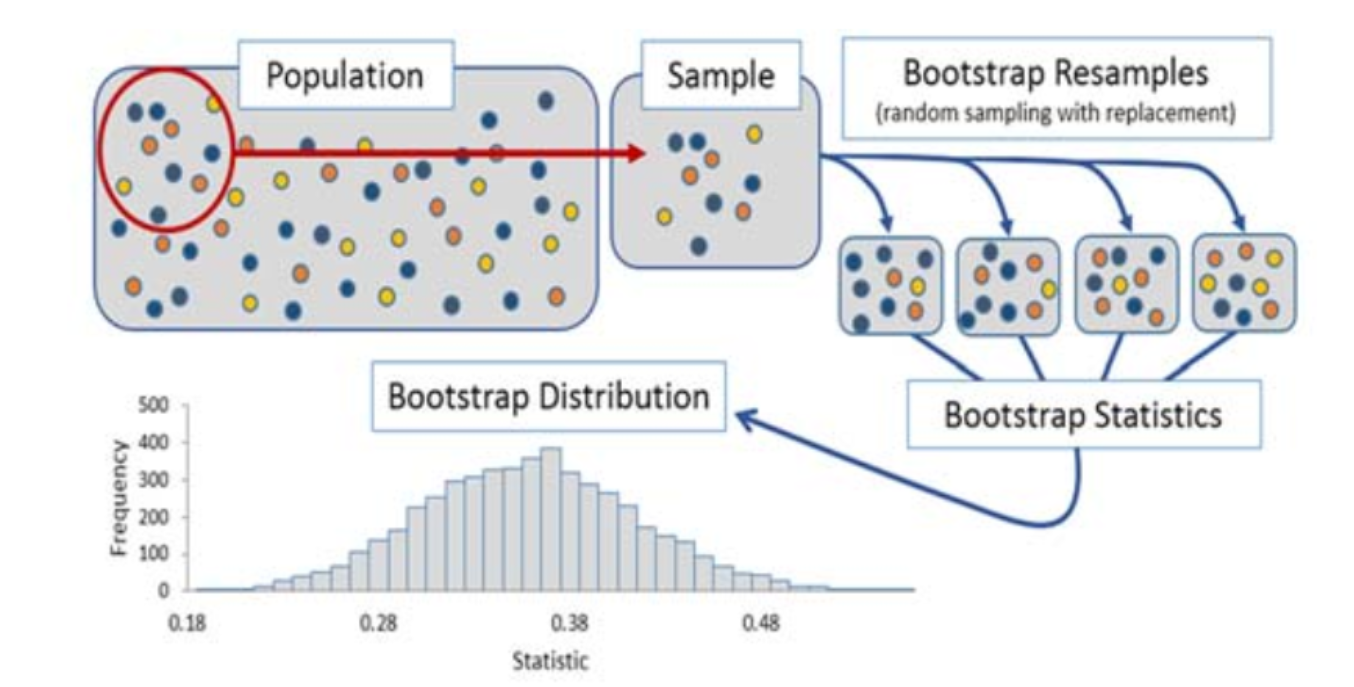

In [81]:
from scipy.stats import trim_mean
from matplotlib import style

# estilo de graficas
style.use('ggplot') or plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm

In [82]:
df.shape

(30000, 25)

In [83]:
print(PromedioInicial)
print(PromedioSinAtipico)

167484.32266666667
164963.2849529045


In [84]:
## Funcion para calcular Media
def calcular_media(x):
  estadistico=np.mean(x)
  return estadistico

In [85]:
def calcular_mediana():
  estadistico=np.median(x)
  return estadistico

In [87]:
def boostraping(x,fun_estadistico,n_iteraciones=10000,Mu=1000):
    n=Mu
    dist_boot=np.full(shape=n_iteraciones,fill_value=np.nan) # se crea el vector
    
    for i in tqdm(range(n_iteraciones)):
        resample=np.random.choice(x,size=n,replace=True)
        dist_boot[i]=fun_estadistico(resample)
        
    return dist_boot 

**Ejecución de Bootstraping**

In [89]:
Promedio_Boostraping=boostraping(x=MontoCredito,
                                 fun_estadistico=calcular_media,
                                 n_iteraciones=200000,
                                 Mu=5000)

100%|██████████| 200000/200000 [00:32<00:00, 6103.75it/s] 


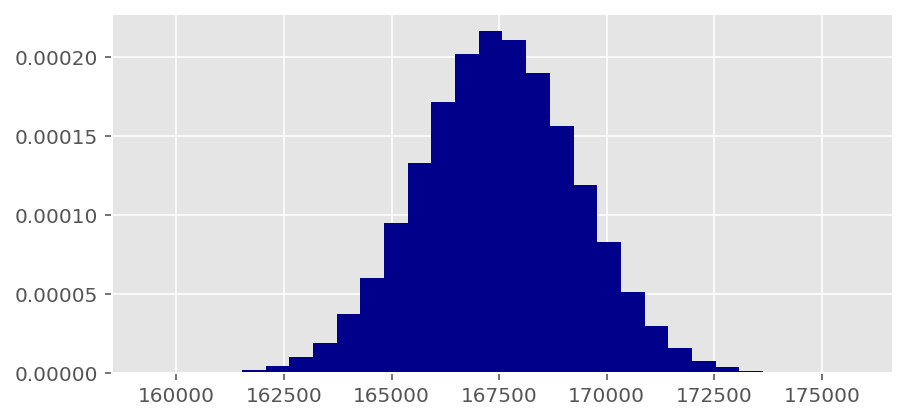

In [90]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(7,3.3))
ax.hist(Promedio_Boostraping,bins=30, density=True,color="darkblue")
plt.show()

In [91]:
Promedio_Boostraping=np.mean(Promedio_Boostraping)

In [92]:
print(Promedio_Boostraping) # Infrencia Remuestro Bossetraping # Yo le creo a este

167482.08278896


* Por TLC su cumple